<a href="https://colab.research.google.com/github/TABEYWICKRAMA/Python_series_end-to-end/blob/main/Gaussian_Naive_Bayes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#Read the data set
df = pd.read_csv("/content/drive/MyDrive/FDM_miniproject/listings_cleaned.csv")

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type']]  # Features
y=df['price']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25) # 70% training and 30% test

In [5]:
df = df.dropna(how='any',axis=0) 

In [6]:
df.isnull().sum()

neighbourhood    0
property_type    0
room_type        0
accommodates     0
bathrooms        0
bedrooms         0
beds             0
bed_type         0
price            0
dtype: int64

In [7]:
df_new = df[np.isfinite(df).all(1)]

In [8]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [9]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 0.5256241787122208


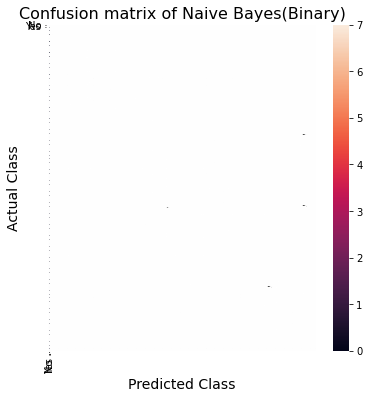

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of Naive Bayes(Binary)',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()